In [1]:
import pandas as pd

ds = pd.read_csv("./Base de dados/GOB_radiation_2014-07.tab", sep='\t', engine='python')
# print(ds.title)
# print(ds.data.head())
ds

,Date/Time,Height [m],SWD [W/m**2],SWD std dev [W/m**2],DIR [W/m**2],DIR std dev [W/m**2],DIF [W/m**2],DIF std dev [W/m**2],LWD [W/m**2],LWD std dev [W/m**2],SWU [W/m**2],LWU [W/m**2],T2 [°C],RH [%],PoPoPoPo [hPa]
0,2014-07-01T00:00,2,-1.0,0.0,0.0,0.0,0.0,0.0,367.0,0.2,0.0,370,10.9,95.1,970
1,2014-07-01T00:01,2,-1.0,0.0,0.0,0.0,0.0,0.0,368.0,0.1,0.0,371,11.1,95.2,970
2,2014-07-01T00:02,2,-1.0,0.0,0.0,0.0,0.0,0.0,368.0,0.1,0.0,370,11.1,95.2,970
3,2014-07-01T00:03,2,-1.0,0.0,0.0,0.0,0.0,0.0,368.0,0.1,0.0,370,11.1,95.3,970
4,2014-07-01T00:04,2,-1.0,0.0,0.0,0.0,0.0,0.0,368.0,0.1,0.0,370,11.2,95.3,970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,2014-07-31T23:55,2,-2.0,0.0,0.0,0.0,-2.0,0.0,325.0,0.1,0.0,388,19.1,40.4,970
44636,2014-07-31T23:56,2,-2.0,0.0,0.0,0.0,-2.0,0.0,325.0,0.1,0.0,389,18.9,40.4,970
44637,2014-07-31T23:57,2,-2.0,0.0,0.0,0.0,-2.0,0.0,325.0,0.0,0.0,388,18.6,40.5,970
44638,2014-07-31T23:58,2,-2.0,0.0,0.0,0.0,-2.0,0.0,325.0,0.1,-7.0,381,18.7,40.8,970


Cleaning the code (getting only 6AM to 6PM)

In [2]:
ds = ds[ds.index < 2*24*60]

In [3]:
ds.time = pd.to_datetime(ds['Date/Time'])
ds.time

C:\Users\Giuli\AppData\Local\Temp\ipykernel_3480\3575160618.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ds.time = pd.to_datetime(ds['Date/Time'])


0      2014-07-01 00:00:00
1      2014-07-01 00:01:00
2      2014-07-01 00:02:00
3      2014-07-01 00:03:00
4      2014-07-01 00:04:00
               ...        
2875   2014-07-02 23:55:00
2876   2014-07-02 23:56:00
2877   2014-07-02 23:57:00
2878   2014-07-02 23:58:00
2879   2014-07-02 23:59:00
Name: Date/Time, Length: 2880, dtype: datetime64[ns]

In [4]:
clean_ds = ds[ds.time.dt.strftime('%H:%M').between('06:00','18:00')]
clean_ds

,Date/Time,Height [m],SWD [W/m**2],SWD std dev [W/m**2],DIR [W/m**2],DIR std dev [W/m**2],DIF [W/m**2],DIF std dev [W/m**2],LWD [W/m**2],LWD std dev [W/m**2],SWU [W/m**2],LWU [W/m**2],T2 [°C],RH [%],PoPoPoPo [hPa]
360,2014-07-01T06:00,2,6.0,0.2,0.0,0.0,6.0,0.1,363.0,0.1,2.0,366,10.1,95.6,971
361,2014-07-01T06:01,2,6.0,0.2,0.0,0.0,6.0,0.3,363.0,0.1,2.0,366,10.1,95.6,971
362,2014-07-01T06:02,2,7.0,0.1,0.0,0.0,7.0,0.1,363.0,0.0,2.0,366,10.2,95.7,971
363,2014-07-01T06:03,2,7.0,0.1,0.0,0.0,7.0,0.1,362.0,0.1,2.0,366,10.2,95.7,971
364,2014-07-01T06:04,2,7.0,0.3,0.0,0.0,7.0,0.3,362.0,0.0,2.0,366,10.2,95.7,971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2014-07-02T17:56,2,-2.0,0.0,0.0,0.0,-2.0,0.0,319.0,0.1,0.0,386,18.3,54.1,969
2517,2014-07-02T17:57,2,-2.0,0.0,0.0,0.0,-2.0,0.0,319.0,0.1,0.0,385,18.3,54.2,969
2518,2014-07-02T17:58,2,-2.0,0.0,0.0,0.0,-2.0,0.0,319.0,0.0,0.0,385,18.2,54.1,970
2519,2014-07-02T17:59,2,-2.0,0.0,0.0,0.0,-2.0,0.0,319.0,0.1,0.0,385,18.1,54.1,970


get into the statistics fun

In [18]:
clean_ds.iloc[[480]]

,Date/Time,Height [m],SWD [W/m**2],SWD std dev [W/m**2],DIR [W/m**2],DIR std dev [W/m**2],DIF [W/m**2],DIF std dev [W/m**2],LWD [W/m**2],LWD std dev [W/m**2],SWU [W/m**2],LWU [W/m**2],T2 [°C],RH [%],PoPoPoPo [hPa]
840,2014-07-01T14:00,2,396.0,1.0,693.0,0.9,84.0,0.1,329.0,0.1,143.0,461,20.6,45.0,968


In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, metrics
from mealpy.bio_based import SMA #trocar por hho
import numpy as np

In [8]:
x = clean_ds[['T2 [°C]', 'RH [%]', 'PoPoPoPo [hPa]']]
x.fillna(0)
x

,T2 [°C],RH [%],PoPoPoPo [hPa]
360,10.1,95.6,971
361,10.1,95.6,971
362,10.2,95.7,971
363,10.2,95.7,971
364,10.2,95.7,971
...,...,...,...
2516,18.3,54.1,969
2517,18.3,54.2,969
2518,18.2,54.1,970
2519,18.1,54.1,970


In [9]:
y = clean_ds[['SWD [W/m**2]']]
y.fillna(0)
y

,SWD [W/m**2]
360,6.0
361,6.0
362,7.0
363,7.0
364,7.0
...,...
2516,-2.0
2517,-2.0
2518,-2.0
2519,-2.0


In [10]:
y = y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y

,SWD [W/m**2]
0,6.0
1,6.0
2,7.0
3,7.0
4,7.0
...,...
1437,-2.0
1438,-2.0
1439,-2.0
1440,-2.0


separate training and test data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train, x_test, y_train, y_test

(      T2 [°C]  RH [%]  PoPoPoPo [hPa]
 885      20.9    43.5             968
 2111     19.3    48.8             970
 2396     20.7    44.7             969
 1983     14.9    64.2             971
 847      20.8    44.7             968
 ...       ...     ...             ...
 1075     16.2    66.0             969
 1984     15.0    64.3             971
 2175     20.6    44.8             969
 595      15.0    77.1             971
 2140     20.5    46.6             970
 
 [1009 rows x 3 columns],
       T2 [°C]  RH [%]  PoPoPoPo [hPa]
 2041     17.4    56.4             970
 2198     21.8    43.4             969
 658      17.3    56.0             970
 813      20.1    48.0             968
 2448     19.6    48.2             969
 ...       ...     ...             ...
 436      10.1    95.6             971
 588      14.3    77.9             971
 822      20.6    47.7             968
 962      19.9    49.9             968
 2117     19.5    48.5             970
 
 [433 rows x 3 columns],
       SW

In [12]:
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)


In [13]:
KERNEL_ENCODER = LabelEncoder()
KERNEL_ENCODER.fit(['linear', 'poly', 'rbf', 'sigmoid'])

LabelEncoder()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor



svr = RandomForestRegressor(n_estimators=30)
# Fit the model
svr.fit(X_train_std, y_train.values.ravel())
# Make the predictions
y_predict = svr.predict(X_test_std)
# Measure the performance
x_print = metrics.r2_score(y_test.values.ravel(), y_predict)
print(x_print)

0.6741064900182411


In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
def fitness_function(solution, flg = None):
#     
    # usando cross_val_score
#     reg = GradientBoostingRegressor(max_depth = round(solution[1]), n_estimators=round(solution[0]), learning_rate=solution[2])
#     if(flg == 'run'):
#         reg.fit(X_train_std, y_train.values.ravel())
#         return reg
    
#     # Measure the performance
#     accuracy = cross_val_score(reg, X_train_std, y_train.values.ravel(), cv=3).mean()
#     print(solution, accuracy)
    
#     if(accuracy <= 0):
#         accuracy = 1
#     return accuracy
    
    #usando cross_validate (mudar lb e ub)
    reg = GradientBoostingRegressor(max_depth = round(solution[1]), n_estimators=round(solution[0]), learning_rate=solution[2])
    
    
    accuracy = cross_validate(reg, X_train_std, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_percentage_error')
    result = np.array(accuracy['test_score']).mean()
    
    if(flg == 'run'):
        print(accuracy)
        reg.fit(X_train_std, y_train.values.ravel())
        return reg
    
    return -result

problem = {
    "fit_func": fitness_function,
    "lb": [  10,  1, 1e-3],
    "ub": [200, 10, 1],
#     "lb": [  10,  1],
#     "ub": [500, 20],
    "minmax": "min",
}

In [104]:
# for i in range (5):
#     print(i, KERNEL_ENCODER.inverse_transform([i]))

# KERNEL_ENCODER.inverse_transform([0])

In [105]:
fitness_function([20, 10, 0.4])
# fitness_function([20,10])


243534717465992.94

In [106]:
# model = SMA.BaseSMA(epoch=20, pop_size=400, verbose=1)
model = SMA.BaseSMA(epoch=20, pop_size=400)
model.solve(problem)
print(f"Best solution: {model.solution[0]}")

print(f"Best accuracy: {model.solution[1]}")

2023/05/29 11:45:04 PM, INFO, mealpy.bio_based.SMA.BaseSMA: Solving single objective optimization problem.
2023/05/29 11:56:06 PM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 1, Current best: 13603268584416.877, Global best: 13603268584416.877, Runtime: 349.61151 seconds
2023/05/29 11:58:24 PM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 2, Current best: 6259663359059.264, Global best: 6259663359059.264, Runtime: 137.47631 seconds
2023/05/30 12:00:39 AM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 3, Current best: 6134430939294.454, Global best: 6134430939294.454, Runtime: 135.66445 seconds
2023/05/30 12:02:24 AM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 4, Current best: 5963232714761.99, Global best: 5963232714761.99, Runtime: 104.38661 seconds
2023/05/30 12:04:47 AM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 5, Current best: 5963232714761.99, Global best: 5963232714761.99, Runtime: 143.63046 seconds
2023/05/30 12:07:07 

Best solution: [32.13293855  7.62485743  1.        ]
Best accuracy: [5963232714761.99, [5963232714761.99]]


In [107]:
melhor_modelo = fitness_function(model.solution[0], flg='run')
y_pred = melhor_modelo.predict(X_test_std)

{'fit_time': array([0.04787302, 0.04814243, 0.04877925, 0.04867887, 0.04551387]), 'score_time': array([0.        , 0.        , 0.00131059, 0.        , 0.        ]), 'test_score': array([-2.47000997e+09, -4.10527584e+13, -7.43168255e+12, -5.64241480e+09,
       -1.16798209e+14])}


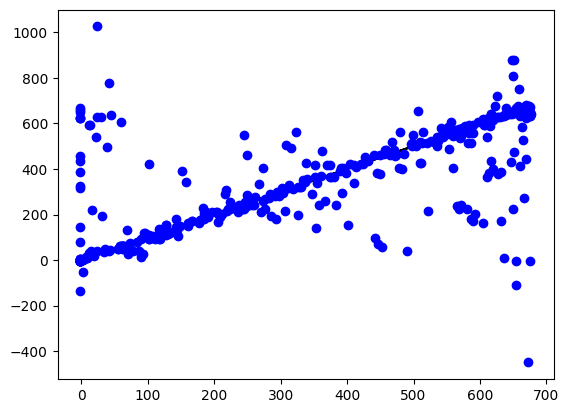

In [108]:
import pylab as plt

plt.plot(y_test, y_test, 'k-')
plt.plot(y_test, y_pred, 'bo')

In [72]:
fitness_function(model.solution[0], 'run')

{'fit_time': array([0.24174905, 0.16524053, 0.13039446, 0.23575521, 0.22015047]), 'score_time': array([0.        , 0.00112128, 0.        , 0.        , 0.        ]), 'test_score': array([ -676.88098214, -1167.6111177 ,  -868.94174776,  -780.19411452,
        -888.71790915])}


GradientBoostingRegressor(learning_rate=0.8901658240211334, max_depth=5,
                          n_estimators=135)